In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import statsmodels.api as sm  # Correct import

## Step 1: Load the Data

In [6]:
# Load the dataset
data = pd.read_csv('day.csv')
data.head(3)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [10]:

# Generate summary statistics
data_description = data.describe()
print(data_description)



          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.5448

## Step 2: Data Cleaning and Transformation


In [11]:
# Converting categorical variables to string values
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['yr'] = data['yr'].map({0: '2018', 1: '2019'})
data['mnth'] = data['mnth'].astype(str)
data['holiday'] = data['holiday'].astype(str)
data['weekday'] = data['weekday'].astype(str)
data['workingday'] = data['workingday'].astype(str)
data['weathersit'] = data['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

# Check for missing values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Handling Outliers

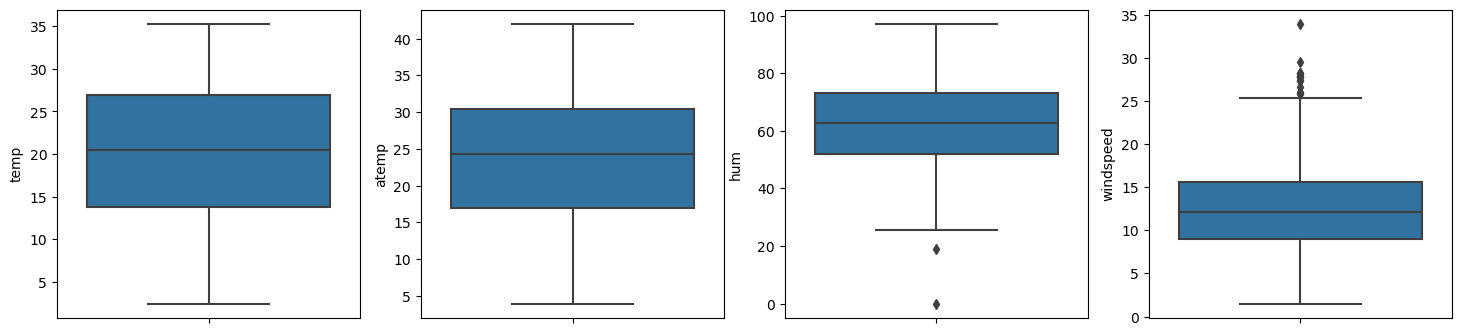

In [12]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=data)
    i+=1

## Exploratory Data Analysis

/var/folders/4_/7sxg0cw55_sf68fwqyjgfg800000gn/T/ipykernel_73697/3504457904.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'Correlation Matrix')

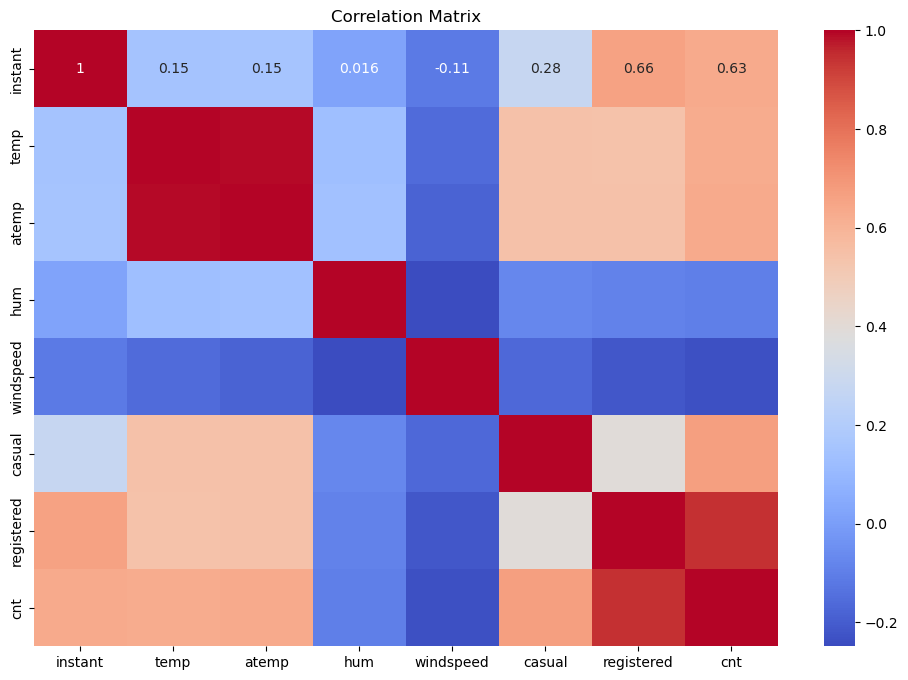

In [13]:
#Corelation matrix 
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [14]:
# Calculate the correlation matrix
correlation_matrix = data[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                cnt      temp     atemp       hum  windspeed
cnt        1.000000  0.627044  0.630685 -0.098543  -0.235132
temp       0.627044  1.000000  0.991696  0.128565  -0.158186
atemp      0.630685  0.991696  1.000000  0.141512  -0.183876
hum       -0.098543  0.128565  0.141512  1.000000  -0.248506
windspeed -0.235132 -0.158186 -0.183876 -0.248506   1.000000


<Figure size 1500x3000 with 0 Axes>

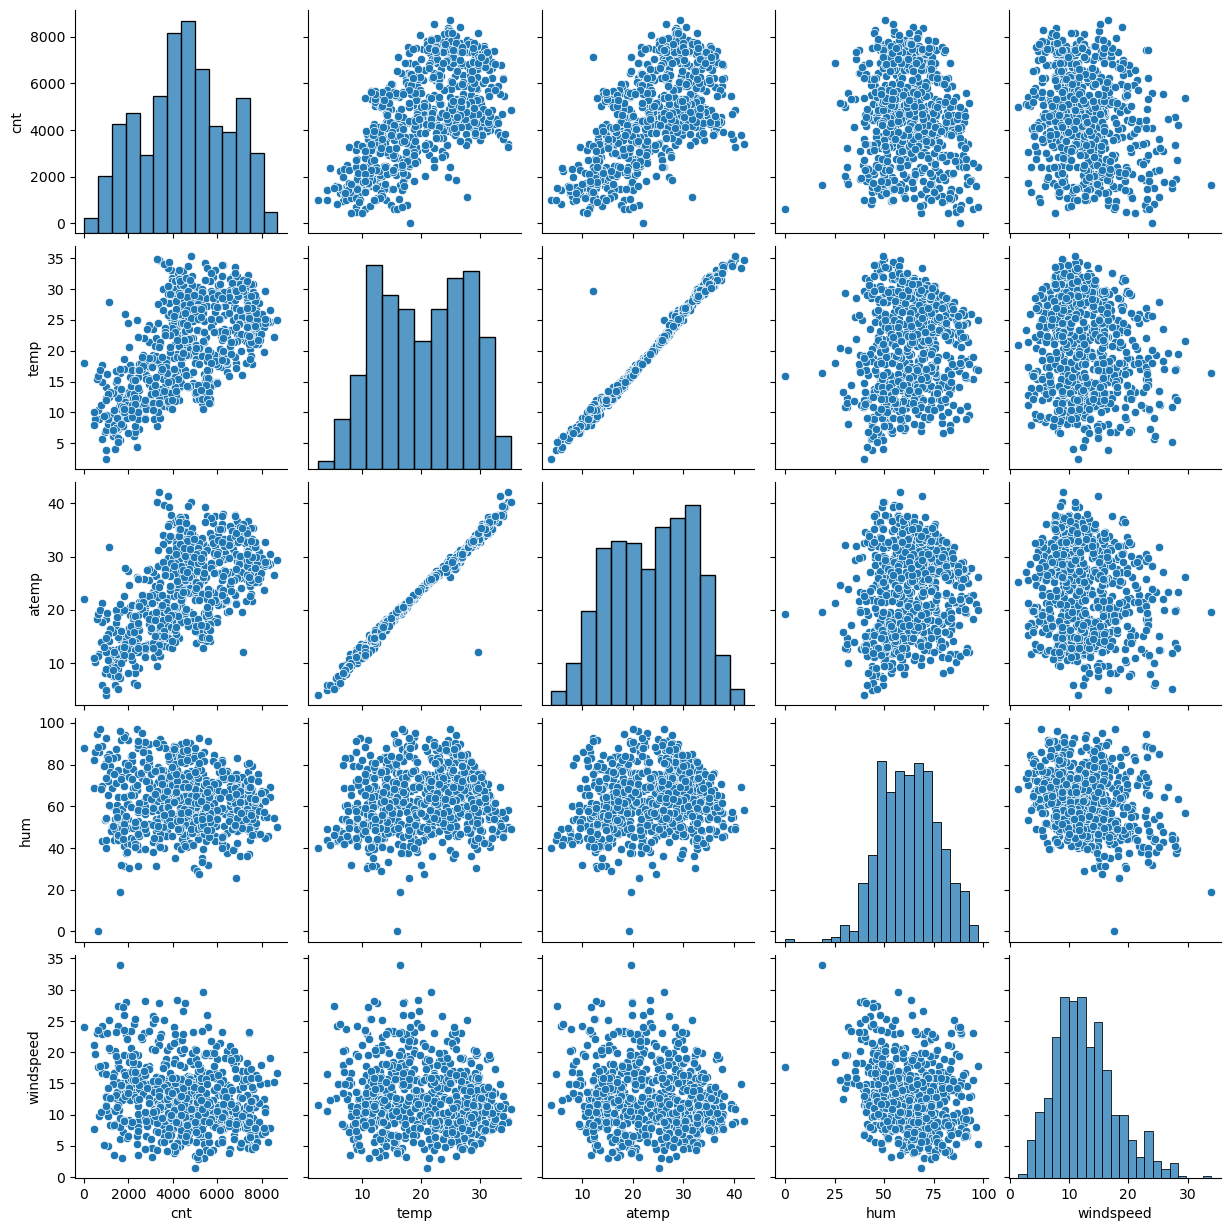

In [15]:
# Pair plots to visualize relationships between numerical variables and the target variable
plt.figure(figsize = (15,30))
sns.pairplot(data[['cnt', 'temp', 'atemp', 'hum', 'windspeed']])
plt.show()

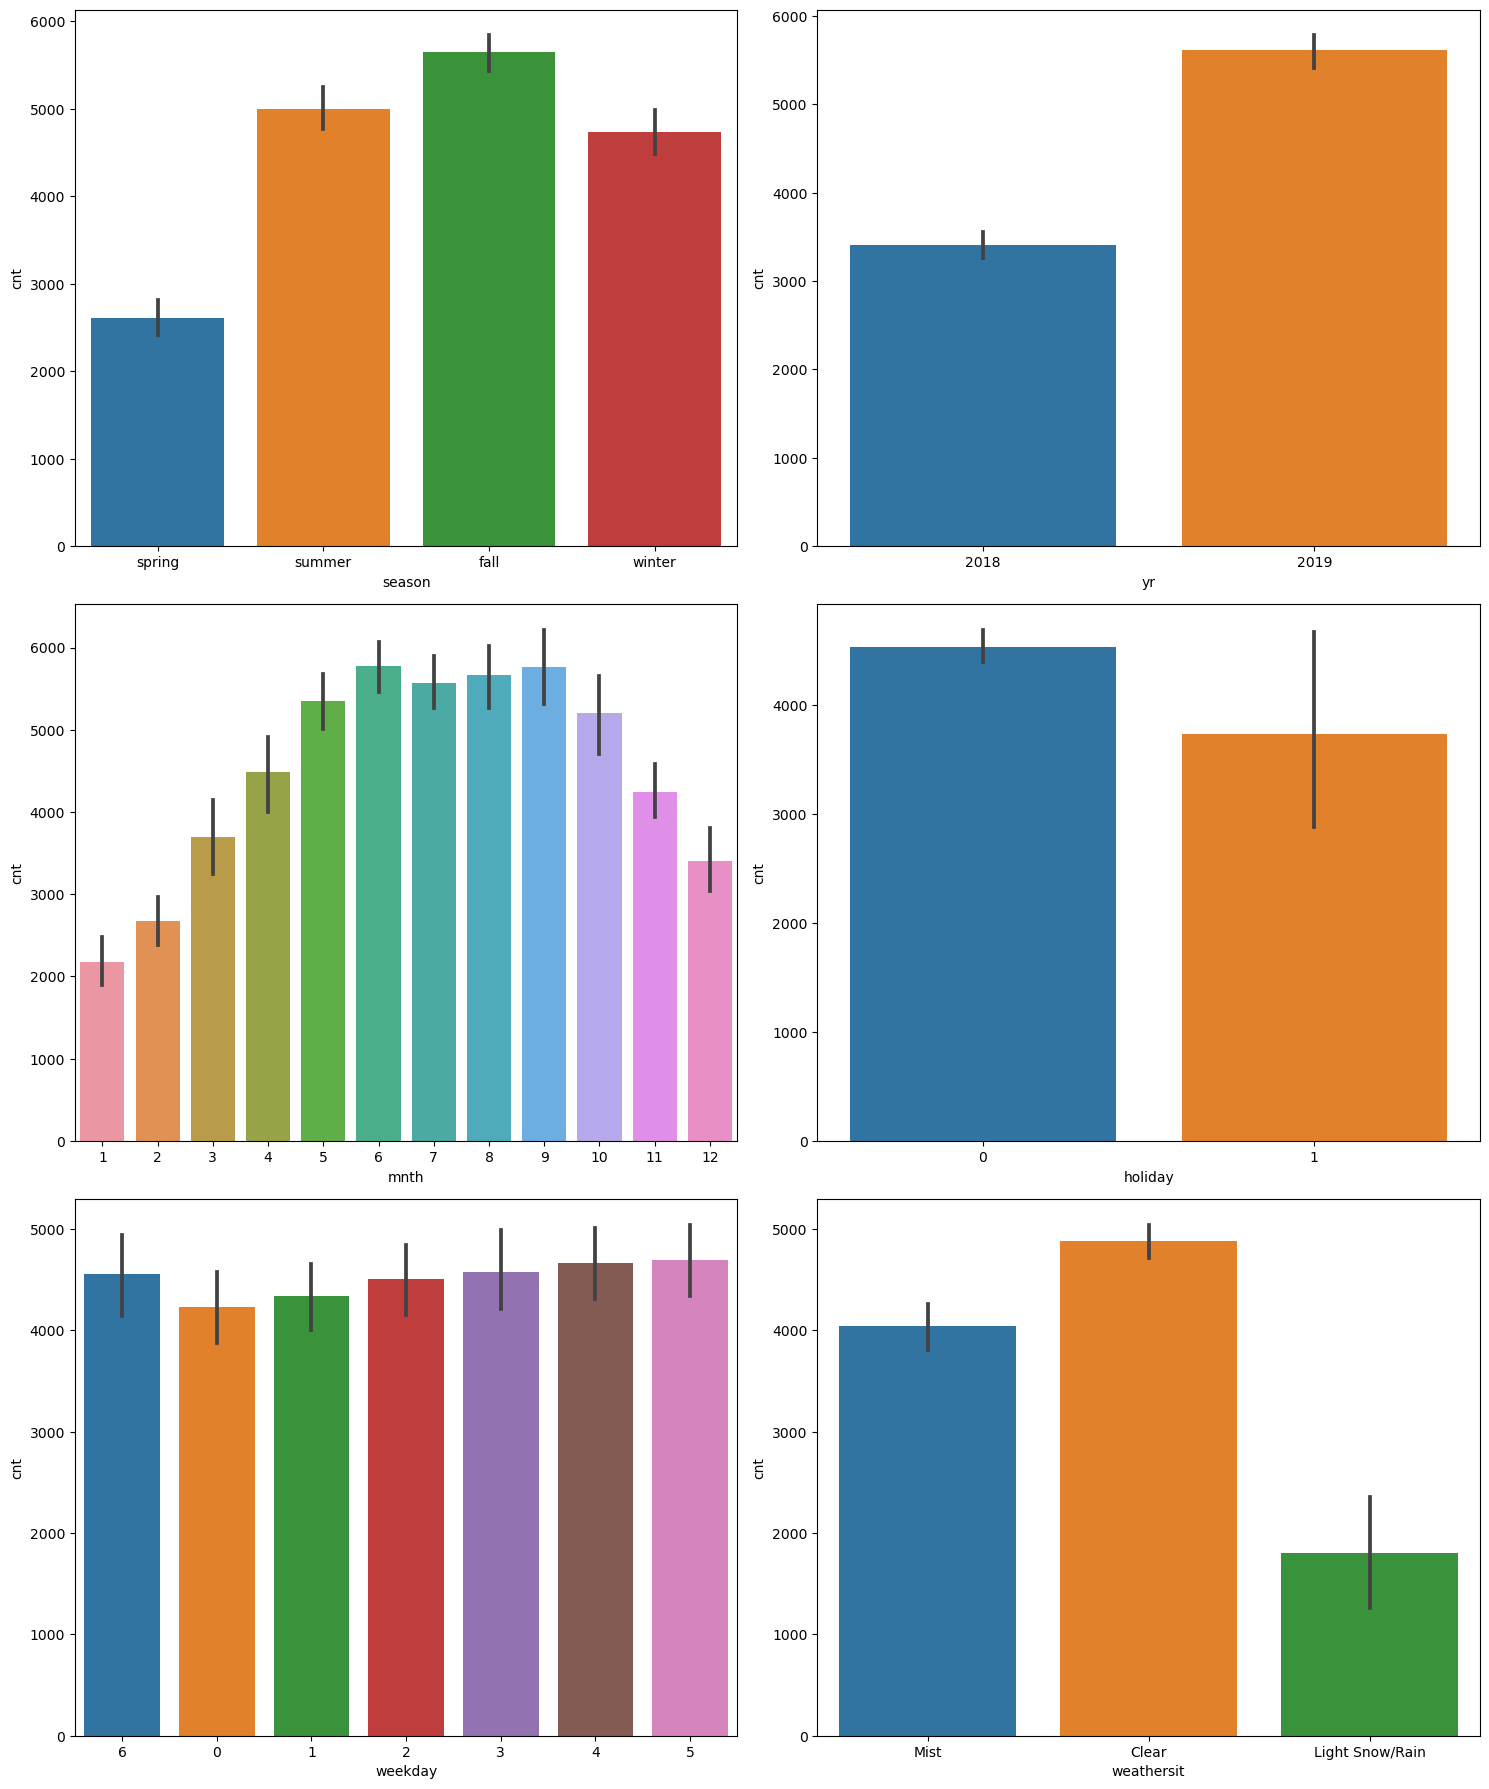

In [16]:
# Bar plots for categorical variables against the target variable 'cnt'
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
sns.barplot(x='season', y='cnt', data=data, ax=axes[0, 0])
sns.barplot(x='yr', y='cnt', data=data, ax=axes[0, 1])
sns.barplot(x='mnth', y='cnt', data=data, ax=axes[1, 0])
sns.barplot(x='holiday', y='cnt', data=data, ax=axes[1, 1])
sns.barplot(x='weekday', y='cnt', data=data, ax=axes[2, 0])
sns.barplot(x='weathersit', y='cnt', data=data, ax=axes[2, 1])
plt.tight_layout()
plt.show()

## Some Insight from EDA

1 Season
The season variable significantly affects the demand for bikes. The bar plot shows that bike rentals are highest during the summer and fall seasons, while the demand drops during winter and spring. This pattern indicates that warmer weather conditions in summer and fall encourage more bike usage.


2. Year (yr)
The yr variable, which distinguishes between the years 2018 and 2019, shows a noticeable increase in bike rentals in 2019 compared to 2018. This suggests that the popularity and adoption of bike-sharing services have increased over time.


3. Month (mnth)
The mnth variable affects bike demand, with higher rentals observed during warmer months like June, July, and August. Conversely, colder months such as January and February see lower bike rentals. This trend aligns with the seasonal variation in bike demand.


4. Holiday
The holiday variable shows that bike rentals are slightly lower on holidays compared to regular days. This may be because people use bike-sharing services more for commuting to work rather than leisure on holidays.


5. Weekday
The weekday variable indicates that bike rentals are fairly consistent throughout the week, with a slight dip on weekends. This suggests that bike-sharing services are used more frequently for weekday commutes.
6. Weather Situation (weathersit)
The weathersit variable significantly impacts bike rentals. Clear weather conditions see the highest bike rentals, while adverse weather conditions like heavy rain or snow lead to a significant drop in bike usage. This is expected as people are less likely to use bikes in poor weather 

## Step 3: Prepare the Data for Modeling

In [17]:
# One-Hot Encoding for categorical variables
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Splitting the data into training and testing sets
X = data.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
y = data['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling numerical features
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']
scaler = StandardScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [19]:
# Function to calculate VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Initial VIF calculation
vif_before = calculate_vif(X_train)
print("VIF before feature selection:\n", vif_before)


VIF before feature selection:
                        Feature         VIF
0                         temp  215.871632
1                        atemp  201.040721
2                          hum    2.035634
3                    windspeed    1.382090
4                season_spring    5.392897
5                season_summer    9.271107
6                season_winter    8.616952
7                      yr_2019    2.147272
8                      mnth_10    4.286397
9                      mnth_11    4.140070
10                     mnth_12    2.311995
11                      mnth_2    1.764558
12                      mnth_3    1.868341
13                      mnth_4    4.228211
14                      mnth_5    5.089607
15                      mnth_6    4.027671
16                      mnth_7    2.791890
17                      mnth_8    2.181107
18                      mnth_9    2.110692
19                   holiday_1         inf
20                   weekday_1         inf
21                   we

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


## Step 4: Feature Selection using RFE

In [20]:
# Recursive Feature Elimination (RFE)
lin_reg = LinearRegression()
rfe = RFE(lin_reg, n_features_to_select=15)
rfe.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [21]:
# Features selected by RFE
selected_features = X_train.columns[rfe.support_]
print("Selected features by RFE:\n", selected_features)


Selected features by RFE:
 Index(['atemp', 'season_spring', 'season_winter', 'yr_2019', 'mnth_11',
       'mnth_12', 'mnth_3', 'mnth_5', 'mnth_7', 'mnth_9', 'holiday_1',
       'weekday_6', 'workingday_1', 'weathersit_Light Snow/Rain',
       'weathersit_Mist'],
      dtype='object')


## Step 5: Train the Model with Selected Features


In [22]:
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

model = LinearRegression()
model.fit(X_train_rfe, y_train)

LinearRegression()

In [23]:
# Predicting on the train and test set
y_train_pred = model.predict(X_train_rfe)
y_test_pred = model.predict(X_test_rfe)

## Step 6: Evaluate the Model


In [25]:
# Evaluating the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R-squared on train set: {r2_train}')
print(f'R-squared on test set: {r2_test}')

R-squared on train set: 0.8364470602316387
R-squared on test set: 0.8130890529419045


In [26]:
# VIF after feature selection
vif_after = calculate_vif(X_train_rfe)
print("VIF after feature selection:\n", vif_after)


VIF after feature selection:
                        Feature       VIF
0                        atemp  3.170493
1                season_spring  3.173408
2                season_winter  2.643586
3                      yr_2019  1.954168
4                      mnth_11  1.879136
5                      mnth_12  1.370121
6                       mnth_3  1.185463
7                       mnth_5  1.255139
8                       mnth_7  1.505629
9                       mnth_9  1.237642
10                   holiday_1  1.103439
11                   weekday_6  1.392037
12                workingday_1  2.994942
13  weathersit_Light Snow/Rain  1.088885
14             weathersit_Mist  1.543140


In [27]:
# Using statsmodels to check p-values and statistical significance
X_train_rfe_sm = sm.add_constant(X_train_rfe)
sm_model = sm.OLS(y_train, X_train_rfe_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     168.8
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.61e-183
Time:                        10:05:03   Log-Likelihood:                -4130.0
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     495   BIC:                             8360.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Step 7: Residual Analysis and Q-Q Plot 

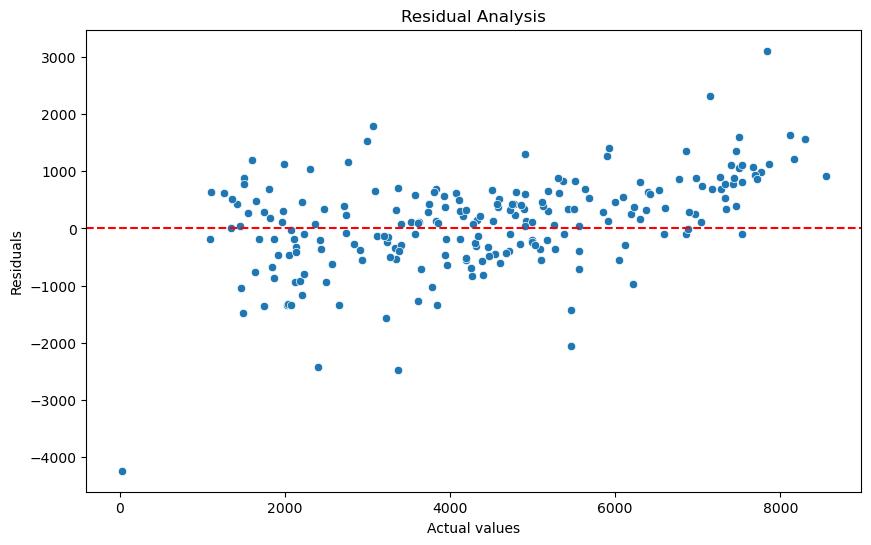

In [28]:
# Residual Analysis
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

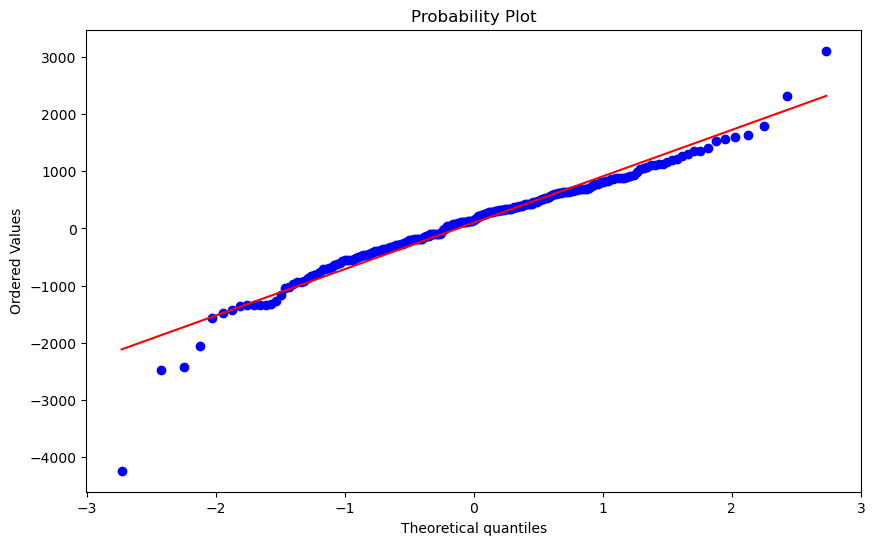

In [29]:
## Q-Q Plot
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

## Step 8: Check Coefficients and Significance


In [30]:
# Add a constant to the model (for the intercept)
X_train_rfe_sm = sm.add_constant(X_train_rfe)


In [45]:
# Train the OLS model
sm_model = sm.OLS(y_train, X_train_rfe_sm).fit()


In [31]:
# Print the summary of the model
print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     168.8
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.61e-183
Time:                        10:05:43   Log-Likelihood:                -4130.0
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     495   BIC:                             8360.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [34]:
# Exclude the intercept (const) from the features
coefficients = sm_model.params.drop('const')
p_values = sm_model.pvalues.drop('const')

# Select significant features (p-value < 0.05)
significant_features = coefficients[p_values < 0.05].sort_values(ascending=False)

print("Top 3 significant features contributing to bike demand:")
print(significant_features.head(3))

Top 3 significant features contributing to bike demand:
yr_2019          2001.438674
season_winter     821.498930
atemp             801.162869
dtype: float64
